Struktur Folder

```
01 Solusi Numerik PDB Metode Euler
| euler.py
| printSoln.py
| contoh1a.py
| contoh1b.py
| contoh1c.py
```

In [1]:
## module euler
''' X,Y = integrate(F,x,y,xStop,h).
    Metode Euler untuk mencari solusi persamaan diferensial biasa
    {y}' = {F(x,{y})}, dimana
    {y} = {y[0],y[1],...y[n-1]}.
    x,y   = Kondisi awal
    xStop = Nilai x akhir
    h     = increment (interval) x
    F     = Fungsi yang ingin dipecahkan
            array F(x,y) = {y'[0],y'[1],...,y'[n-1]}.
'''
import numpy as np
def integrate(F,x,y,xStop,h):

    def euler(F,x,y,h):
        K0 = h*F(x,y)
        return K0

    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + euler(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

In [2]:
## module printSoln
''' printSoln(X,Y,freq).
    Memprint nilai X dan Y dari persamaan diferensial
        freq = n memprint nilai solusi tiap n iterasi
        freq = 0 memprint nilai solusi awal dan akhir
'''
def printSoln(X,Y,freq):

    def printHead(n):
        print ("\n        x  ",end=" ")
        for i in range (n):
            print ("      y[",i,"] ",end=" ")
        print()

    def printLine(x,y,n):
        print ("%13.4e"% x,end=" ")
        for i in range (n):
            print ("%13.4e"% y[i],end=" ")
        print()

    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)
    if i != m - 1: printLine(X[m - 1],Y[m - 1],n)

# Contoh 1a Gerak Jatuh tanpa Gesekan Udara

---SOLUSI PDB MENGGUNAKAN METODE EULER---
-----------------------------------------

        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    0.0000e+00    0.0000e+00 
   1.0000e-01    0.0000e+00    9.8000e-01 
   2.0000e-01    9.8000e-02    1.9600e+00 
   3.0000e-01    2.9400e-01    2.9400e+00 
   4.0000e-01    5.8800e-01    3.9200e+00 
   5.0000e-01    9.8000e-01    4.9000e+00 
   6.0000e-01    1.4700e+00    5.8800e+00 
   7.0000e-01    2.0580e+00    6.8600e+00 
   8.0000e-01    2.7440e+00    7.8400e+00 
   9.0000e-01    3.5280e+00    8.8200e+00 
   1.0000e+00    4.4100e+00    9.8000e+00 
   1.1000e+00    5.3900e+00    1.0780e+01 
   1.2000e+00    6.4680e+00    1.1760e+01 
   1.3000e+00    7.6440e+00    1.2740e+01 
   1.4000e+00    8.9180e+00    1.3720e+01 
   1.5000e+00    1.0290e+01    1.4700e+01 
   1.6000e+00    1.1760e+01    1.5680e+01 
   1.7000e+00    1.3328e+01    1.6660e+01 
   1.8000e+00    1.4994e+01    1.7640e+01 
   1.9000e+00    1.6758e+01    1.8620e+01 
   2.0000e+00 

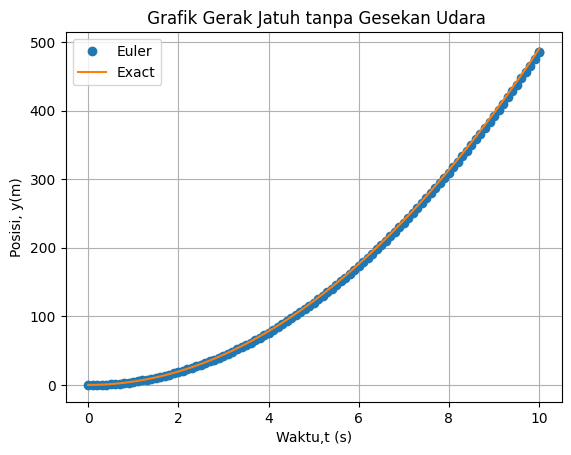

In [4]:
##contoh 1a_euler
import numpy as np
#from printSoln import *
#from euler import *
import matplotlib.pyplot as plt

# input data
g=9.8

# persamaan diferensial biasa
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = g
    return F
x = 0.0 # Start of integration
xStop = 10.0 # End of integration
y = np.array([0.0,0.0]) # Initial values of {y}
h = 0.1 # Step size
freq = 1
# solusi numerik menggunakan Euler
X,Y = integrate(F,x,y,xStop,h)

# solusi eksak
Yexact = (1/2)*g*X*X;

# memprint nilai solusi euler dan eksak
print("---SOLUSI PDB MENGGUNAKAN METODE EULER---")
print("-----------------------------------------")
printSoln(X,Y,freq)
print("-----------------------------------------")

# memplot nilai solusi euler dan eksak
plt.plot(X,Y[:,0],'o',X,Yexact,'-')
plt.grid(True)
plt.title(' Grafik Gerak Jatuh tanpa Gesekan Udara')
plt.xlabel('Waktu,t (s)'); plt.ylabel('Posisi, y(m)')
plt.legend(('Euler','Exact'),loc=0)
plt.show()

# Contoh 1b Gerak Jatuh dengan Gesekan Udara

---SOLUSI PDB MENGGUNAKAN METODE EULER---
-----------------------------------------

        x         y[ 0 ]  
   0.0000e+00    0.0000e+00 
   5.0000e-01    4.9000e+00 
   1.0000e+00    9.5550e+00 
   1.5000e+00    1.3977e+01 
   2.0000e+00    1.8178e+01 
   2.5000e+00    2.2169e+01 
   3.0000e+00    2.5961e+01 
   3.5000e+00    2.9563e+01 
   4.0000e+00    3.2985e+01 
   4.5000e+00    3.6236e+01 
   5.0000e+00    3.9324e+01 
   5.5000e+00    4.2258e+01 
   6.0000e+00    4.5045e+01 
   6.5000e+00    4.7692e+01 
   7.0000e+00    5.0208e+01 
   7.5000e+00    5.2597e+01 
   8.0000e+00    5.4868e+01 
   8.5000e+00    5.7024e+01 
   9.0000e+00    5.9073e+01 
   9.5000e+00    6.1019e+01 
   1.0000e+01    6.2868e+01 
-----------------------------------------


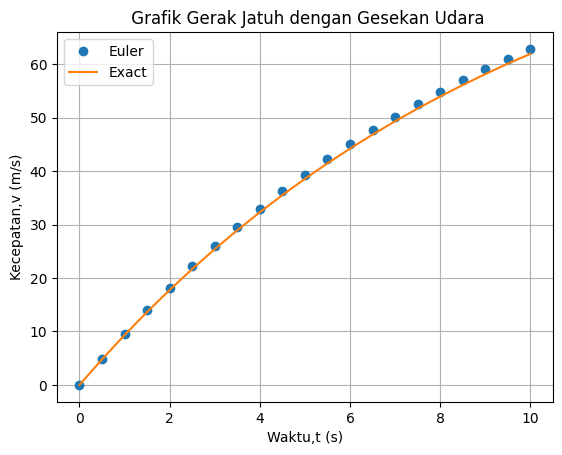

In [6]:
##Contoh 1b
import numpy as np
#from printSoln import *
#from euler import *
import matplotlib.pyplot as plt

# input data
g=9.8
c=7.0
m=70.0

# persamaan diferensial biasa
def F(x,y):
    F = np.zeros(1)
    F[0] = g - (c/m)*y[0]
    return F
x = 0.0 # Start of integration
xStop = 10.0 # End of integration
y = np.array([0.0]) # Initial values of {y}
h = 0.5 # Step size
freq = 1
# solusi numerik menggunakan Euler
X,Y = integrate(F,x,y,xStop,h)

# solusi eksak
Yexact = (g*m/c)*(1-np.exp(-(c/m)*X));

# memprint nilai solusi euler dan eksak
print("---SOLUSI PDB MENGGUNAKAN METODE EULER---")
print("-----------------------------------------")
printSoln(X,Y,freq)
print("-----------------------------------------")

# memplot nilai solusi euler dan eksak
plt.plot(X,Y[:,0],'o',X,Yexact,'-')
plt.grid(True)
plt.title(' Grafik Gerak Jatuh dengan Gesekan Udara')
plt.xlabel('Waktu,t (s)'); plt.ylabel('Kecepatan,v (m/s)')
plt.legend(('Euler','Exact'),loc=0)
plt.show()
#input("Press return to exit")

# Contoh 1C Gerak Jatuh dengan Gesekan Udara

---SOLUSI PDB MENGGUNAKAN METODE EULER---
-----------------------------------------

        x         y[ 0 ]  
   0.0000e+00    0.0000e+00 
   1.0000e-01    9.8000e-01 
   2.0000e-01    1.9502e+00 
   3.0000e-01    2.9107e+00 
   4.0000e-01    3.8616e+00 
   5.0000e-01    4.8030e+00 
   6.0000e-01    5.7349e+00 
   7.0000e-01    6.6576e+00 
   8.0000e-01    7.5710e+00 
   9.0000e-01    8.4753e+00 
   1.0000e+00    9.3706e+00 
   1.1000e+00    1.0257e+01 
   1.2000e+00    1.1134e+01 
   1.3000e+00    1.2003e+01 
   1.4000e+00    1.2863e+01 
   1.5000e+00    1.3714e+01 
   1.6000e+00    1.4557e+01 
   1.7000e+00    1.5392e+01 
   1.8000e+00    1.6218e+01 
   1.9000e+00    1.7035e+01 
   2.0000e+00    1.7845e+01 
   2.1000e+00    1.8647e+01 
   2.2000e+00    1.9440e+01 
   2.3000e+00    2.0226e+01 
   2.4000e+00    2.1004e+01 
   2.5000e+00    2.1774e+01 
   2.6000e+00    2.2536e+01 
   2.7000e+00    2.3290e+01 
   2.8000e+00    2.4038e+01 
   2.9000e+00    2.4777e+01 
   3.0000e+00    2

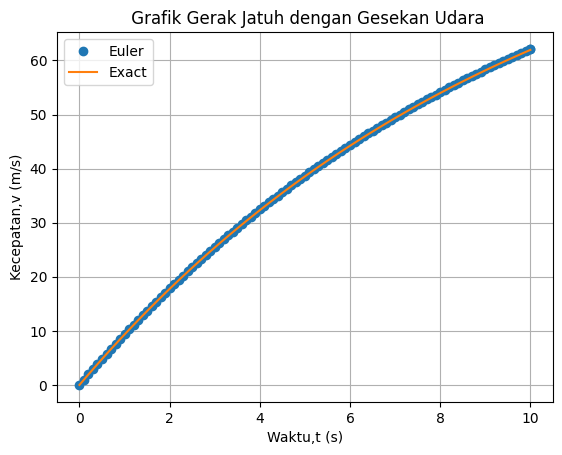

In [8]:
##Contoh 2c_
import numpy as np
#from printSoln import *
#from euler import *
import matplotlib.pyplot as plt

# input data
g=9.8
c=7.0
m=70.0

# persamaan diferensial biasa
def F(x,y):
    F = np.zeros(1)
    F[0] = g - (c/m)*y[0]
    return F
x = 0.0 # Start of integration
xStop = 10.0 # End of integration
y = np.array([0.0]) # Initial values of {y}
h = 0.1 # Step size
freq = 1
# solusi numerik menggunakan Euler
X,Y = integrate(F,x,y,xStop,h)

# solusi eksak
Yexact = (g*m/c)*(1-np.exp(-(c/m)*X));

# memprint nilai solusi euler dan eksak
print("---SOLUSI PDB MENGGUNAKAN METODE EULER---")
print("-----------------------------------------")
printSoln(X,Y,freq)
print("-----------------------------------------")

# memplot nilai solusi euler dan eksak
plt.plot(X,Y[:,0],'o',X,Yexact,'-')
plt.grid(True)
plt.title(' Grafik Gerak Jatuh dengan Gesekan Udara')
plt.xlabel('Waktu,t (s)'); plt.ylabel('Kecepatan,v (m/s)')
plt.legend(('Euler','Exact'),loc=0)
plt.show()